In [47]:
#hw4 q2a
import math
import matplotlib.pyplot as plt
import numpy as np
xi = 0
f = 0
chi = 0
kappa = 0.5
lamb = 0.05
omega = 0.75
dt = 0.01
u1_init = 0.1
u2_init = 0.1
u3_init = 0.3
t0 = 0
u1_list = [u1_init]
u2_list = [u2_init]
u3_list = [u3_init]
k1 = []
k2 = []
k3 = []
k4 = []
def h(u1,u2):
    return pow(u1,4)/8 - u1*u1/4 + u2*u2/2
def f1(t,u1,u2,u3):
    return u2
def f2(t,u1,u2,u3,f=f,omega=omega,xi=xi,chi=chi):
    return f*math.cos(math.radians(omega * t)) + 1/2*(u1 - pow(u1,3)) - 2*xi*u2 + chi*u3
def f3(t,u1,u2,u3,kappa=kappa,lamb=lamb):
    return -kappa*u2 - lamb*u3

def runge_kutta4(x,dt,t0, xi=xi, f=f, chi=chi, kappa=kappa, lamb=lamb,omega=omega):
    global  u1_list, u2_list, u3_list
    n = (int) ((x - t0) / dt)
    for t in range(n):
        k1 = [dt*f1(t0, u1_list[t], u2_list[t], u3_list[t]), \
              dt*f2(t0, u1_list[t], u2_list[t], u3_list[t],f=f,omega=omega,xi=xi,chi=chi), \
              dt*f3(t0, u1_list[t], u2_list[t], u3_list[t],kappa=kappa,lamb=lamb)]
        k2 = [dt*f1(t0 + dt/2, u1_list[t] + k1[0]/2, u2_list[t] + k1[1]/2, u3_list[t] + k1[2]/2),\
              dt*f2(t0 + dt/2, u1_list[t] + k1[0]/2, u2_list[t] + k1[1]/2, u3_list[t] + k1[2]/2,f=f,omega=omega,xi=xi,chi=chi),\
              dt*f3(t0 + dt/2, u1_list[t] + k1[0]/2, u2_list[t] + k1[1]/2, u3_list[t] + k1[2]/2,kappa=kappa,lamb=lamb)]
        k3 = [dt*f1(t0 + dt/2, u1_list[t] + k2[0]/2, u2_list[t] + k2[1]/2, u3_list[t] + k2[2]/2),\
              dt*f2(t0 + dt/2, u1_list[t] + k2[0]/2, u2_list[t] + k2[1]/2, u3_list[t] + k2[2]/2,f=f,omega=omega,xi=xi,chi=chi),\
              dt*f3(t0 + dt/2, u1_list[t] + k2[0]/2, u2_list[t] + k2[1]/2, u3_list[t] + k2[2]/2,kappa=kappa,lamb=lamb)]
        k4 = [dt*f1(t0 + dt, u1_list[t] + k3[0], u2_list[t] + k3[1], u3_list[t] + k3[2]),\
              dt*f2(t0 + dt, u1_list[t] + k3[0], u2_list[t] + k3[1], u3_list[t] + k3[2],f=f,omega=omega,xi=xi,chi=chi),\
              dt*f3(t0 + dt, u1_list[t] + k3[0], u2_list[t] + k3[1], u3_list[t] + k3[2],kappa=kappa,lamb=lamb)]
        u1_next = u1_list[t] + 1.0/6.0*(k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
        u2_next = u2_list[t] + 1.0/6.0*(k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
        u3_next = u3_list[t] + 1.0/6.0*(k1[2] + 2*k2[2] + 2*k3[2] + k4[2])
        u1_list.append(u1_next)
        u2_list.append(u2_next)
        u3_list.append(u3_next)
        t0 = t0 + dt
        
def runge_kutta3(x,dt,t0):
    global u1_list, u2_list, u3_list
    n = (int) ((x - t0)/ dt)
    for t in range(n):
        k1 = [dt*f1(t0, u1_list[t], u2_list[t], u3_list[t]),\
              dt*f2(t0, u1_list[t], u2_list[t], u3_list[t]),\
              dt*f3(t0, u1_list[t], u2_list[t], u3_list[t])]
        k2 = [dt*f1(t0 + dt/2, u1_list[t] + k1[0]/2, u2_list[t] + k1[1]/2, u3_list[t] + k1[2]/2),\
              dt*f2(t0 + dt/2, u1_list[t] + k1[0]/2, u2_list[t] + k1[1]/2, u3_list[t] + k1[2]/2),\
              dt*f3(t0 + dt/2, u1_list[t] + k1[0]/2, u2_list[t] + k1[1]/2, u3_list[t] + k1[2]/2)]
        k3 = [dt*f1(t0 + dt, u1_list[t] + k2[0], u2_list[t] + k2[1], u3_list[t] + k2[2]),\
              dt*f2(t0 + dt, u1_list[t] + k2[0], u2_list[t] + k2[1], u3_list[t] + k2[2]),\
              dt*f3(t0 + dt, u1_list[t] + k2[0], u2_list[t] + k2[1], u3_list[t] + k2[2])]
        u1_next = u1_list[t] + 1.0/6.0*(k1[0] + 4*k2[0] + k3[0])
        u2_next = u2_list[t] + 1.0/6.0*(k1[1] + 4*k2[1] + k3[1])
        u3_next = u3_list[t] + 1.0/6.0*(k1[2] + 4*k2[2] + k3[2])
        u1_list.append(u1_next)
        u2_list.append(u2_next)
        u3_list.append(u3_next)
        t0 = t0 + dt
def init(dt, u1_init = u1_init, u2_init = u2_init, u3_init = u3_init, xi=xi, f=f, chi=chi, kappa=kappa, lamb=lamb,omega=omega, T=10):
    global u1_list, u2_list, u3_list
    u1_list = [u1_init]
    u2_list = [u2_init]
    u3_list = [u3_init]
    runge_kutta4(T, dt, 0,xi=xi, f=f, chi=chi, kappa=kappa, lamb=lamb,omega=omega)
    return u1_list, u2_list, u3_list
def sample(dt, T, period, sample_list):
    sample_index = [math.floor(i/dt) for i in np.arange(0,T,period)]
    sampled = [sample_list[i] for i in sample_index]
    return sampled


slope = 2.9999919508098523


Text(0.5, 1.0, 'Order of accuracy analysis, slope = 3.00')

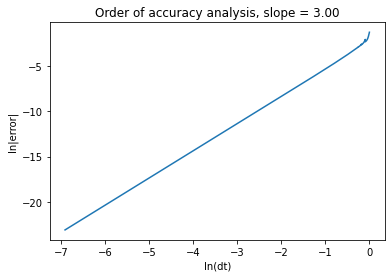

In [48]:
#error analysis
dt_list = []
err_list = []
for dt_i in range(1,1000):
    dt = 0.001 * dt_i
    dt_list.append(dt)
    u1_list = [u1_init]
    u2_list = [u2_init]
    u3_list = [u3_init]
    runge_kutta3(10, dt, 0)
    est_u1 = u1_list[-1]
    est_u2 = u2_list[-1]
    err = abs(h(est_u1, est_u2) - h(u1_init, u2_init))
    err_list.append(err)
def mylog(arr):
    return [math.log(ai) if ai > 0 else 0 for ai in arr]
logdt = np.array(mylog(dt_list))
logerr = np.array(mylog(err_list))

plt.plot(logdt, logerr)
plt.xlabel("ln(dt)")
plt.ylabel("ln|error|")

x1 = logdt[np.where(logdt == logdt[logdt > -5][0])][0]
y1 = logerr[np.where(logdt == logdt[logdt > -5][0])][0]
x0 = logdt[np.where(logdt == logdt[logdt < -1][0])][0]
y0 = logerr[np.where(logdt == logdt[logdt < -1][0])][0]
slope = (y1 - y0) / (x1 - x0)
print("slope = {}".format(slope))
plt.title("Order of accuracy analysis, slope = {:.2f}".format(slope))

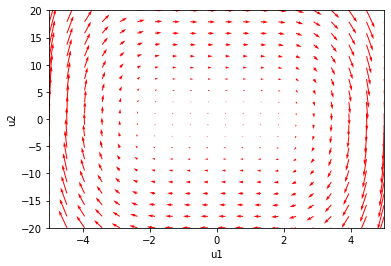

<Figure size 432x288 with 0 Axes>

In [ ]:
#hw4 q2b
#obtain a few phase portraits for the case chi=f=0 and xi > 0
xi = 0.01
f = 0
chi = 0
kappa = 0.5
lamb = 0.05
omega = 0
u1space = np.linspace(-5.0, 5.0, 20)
u2space = np.linspace(-20.0, 20.0, 20)
u1mesh,u2mesh = np.meshgrid(u1space, u2space)
t = 0
u,v = np.zeros(u1mesh.shape), np.zeros(u2mesh.shape)
NI, NJ = u1mesh.shape
u3_init = 0
def f1(t,u1,u2,u3):
    return u2
def f2(t,u1,u2,u3):
    return f*math.cos(omega * t) + 1/2*(u1 - pow(u1,3)) - 2*xi*u2 + chi*u3
for i in range(NI):
    for j in range(NJ):
        u1_i = u1mesh[i,j]
        u2_i = u2mesh[i,j]
        u3_i = 0
        f1out = f1(t,u1_i,u2_i,u3_i)
        f2out = f2(t,u1_i,u2_i,u3_i)
        u[i,j] = f1out
        v[i,j] = f2out
Q = plt.quiver(u1mesh, u2mesh, u, v, color = 'r')
plt.xlabel('u1')
plt.ylabel('u2')
plt.xlim([-5,5])
plt.ylim([-20,20])
plt.show()
plt.savefig("hw4_q2b_xlim5_xi001.png")

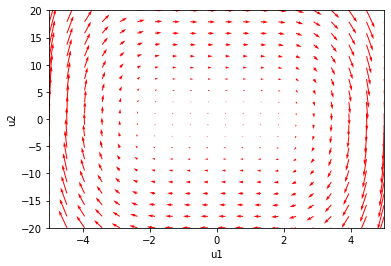

<Figure size 432x288 with 0 Axes>

In [ ]:
#hw4 q2b
#obtain a few phase portraits for the case chi=f=0 and xi > 0
xi = 0.01
f = 0
chi = 0
kappa = 0.5
lamb = 0.05
omega = 0
u1lim = 5.0
u2lim = 20.0
u1space = np.linspace(-u1lim, u1lim, 20)
u2space = np.linspace(-u2lim, u2lim, 20)
u1mesh,u2mesh = np.meshgrid(u1space, u2space)
t = 0
u,v = np.zeros(u1mesh.shape), np.zeros(u2mesh.shape)
NI, NJ = u1mesh.shape
u3_init = 0
def f1(t,u1,u2,u3):
    return u2
def f2(t,u1,u2,u3):
    return f*math.cos(math.radians(omega * t)) + 1/2*(u1 - pow(u1,3)) - 2*xi*u2 + chi*u3
def f1f2(y, t):
    u1,u2 = y
    u3 = 0
    return [f1(t,u1,u2,u3), f2(t,u1,u2,u3)]
for i in range(NI):
    for j in range(NJ):
        u1_i = u1mesh[i,j]
        u2_i = u2mesh[i,j]
        u3_i = 0
        f1out = f1(t,u1_i,u2_i,u3_i)
        f2out = f2(t,u1_i,u2_i,u3_i)
        u[i,j] = f1out
        v[i,j] = f2out

    



Q = plt.quiver(u1mesh, u2mesh, u, v, color = 'r')


plt.xlabel('u1')
plt.ylabel('u2')
plt.xlim([-u1lim,u1lim])
plt.ylim([-u2lim,u2lim])
plt.show()
plt.savefig("hw4_q2b_xlim5_xi001.png")


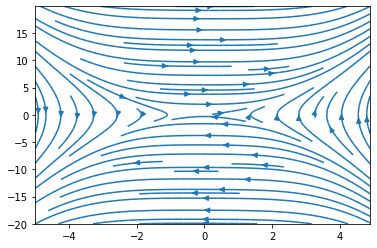

<Figure size 432x288 with 0 Axes>

In [ ]:
from pylab import *
xi = 0.01
u1lim = 5.0
u2lim = 20.0
u1space = np.linspace(-u1lim, u1lim, 20)
u2space = np.linspace(-u2lim, u2lim, 20)
u1vals, u2vals = meshgrid(arange(-5, 5, 0.1), arange(-20, 20, 0.1))
u1dot = u2vals
u2dot = 0.5*(u1vals + u1vals*u1vals*u1vals) - 2*xi*u2vals
streamplot(u1vals, u2vals, u1dot, u2dot)
grid;show();
savefig("hw4_q2b_phase_portriait_xi{}.png".format(str(xi).replace(".","")))

In [ ]:
init(dt = 0.001)

Text(0.5, 1.0, 'phase portriat with parameters: xi = 0.64, chi = 0, f = 0')

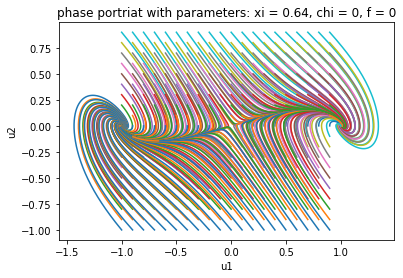

In [18]:
xi = 0.64
chi = f = 0
omega = 1
kappa = 0.5
lamb = 0.05
omega = 0.75
xlim = ylim = 1
u1_t = []
u2_t = []
for u1i in np.arange(-xlim,xlim,0.1):
    for u2i in np.arange(-ylim,ylim,0.1):
        init(dt = 0.01, u1_init = u1i, u2_init = u2i, xi=xi, chi=chi, f=f)
        plt.plot(u1_list, u2_list)
plt.xlabel("u1")
plt.ylabel("u2")
plt.title("phase portriat with parameters: xi = {}, chi = {}, f = {}".format(xi, chi, f))

Text(0.5, 1.0, 'Poincare map with parameters zeta:0.02, chi:0.07,f:0.03,u1_0:1.00,u2_0:1.50')

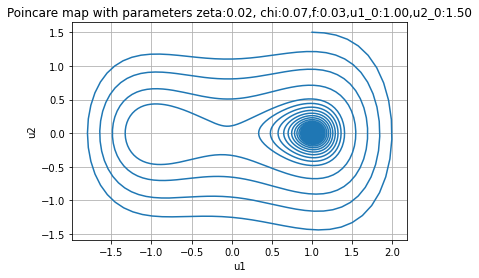

In [119]:
xi = 0.02
chi = 0.07
f = 0.03
xlim = ylim = 10
omega = 0.7
u1i = 1.0
u2i = 1.5
T = 10000
#T = 10
#for u1i in np.arange(-ylim,ylim,2*math.pi/omega):
#    for u2i in np.arange(-xlim,xlim,2*math.pi/omega):
fig1, ax1 = plt.subplots()
u1_list, u2_list, u3_list = init(dt = 0.1, u1_init = u1i, u2_init = u2i,xi=xi, chi=chi, f=f, omega=omega, T = T)

ax1.plot(u1_list, u2_list)
ax1.set_xlabel("u1")
ax1.set_ylabel("u2")
ax1.grid()
ax1.set_title("Poincare map with parameters zeta:{:.2f}, chi:{:.2f},f:{:.2f},u1_0:{:.2f},u2_0:{:.2f}".format(xi,chi,f,u1i,u2i))

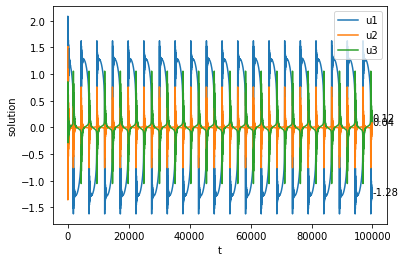

In [112]:
t = [ti*dt for ti in list(range(len(u1_list)))]
plt.plot(t, u1_list, label = "u1")
plt.plot(t, u2_list, label = "u2")
plt.plot(t, u3_list, label = "u3")
plt.annotate("{:.2f}".format(u1_list[-1]), (t[-1], u1_list[-1]))
plt.annotate("{:.2f}".format(u2_list[-1]), (t[-1], u2_list[-1]))
plt.annotate("{:.2f}".format(u3_list[-1]), (t[-1], u3_list[-1]))
#u1_sample = sample()
plt.xlabel("t")
plt.ylabel("solution")
plt.legend()
plt.show()

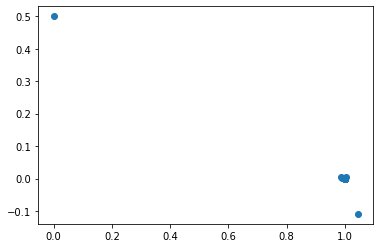

<Figure size 432x288 with 0 Axes>

In [37]:

xi = 0.32
chi = 0.1
f = 0
xlim = ylim = 10
omega = 1.2
u1i = 0
u2i = 0.5
period = 2*math.pi/omega
T = 10000 * period
dt = 0.1
#for u1i in np.arange(0,T,period):
#    for u2i in np.arange(0,T,period):
u1_list, u2_list, u3_list = init(dt = dt, u1_init = u1i, u2_init = u2i, xi=xi, chi=chi, f=f, omega=omega, T=T)
sample_index = [math.floor(i/dt) for i in np.arange(0,T,period)]
u1_sample = [u1_list[i] for i in sample_index]
u2_sample = [u2_list[i] for i in sample_index]
plt.scatter(u1_sample, u2_sample)
plt.show()
plt.savefig("chaotic1.png")


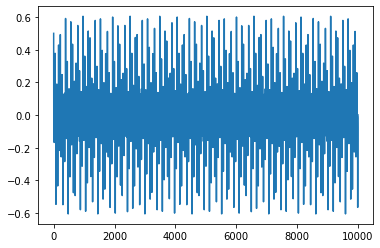

In [27]:
plt.plot(u2_sample)